## Метод опорных векторов в sklearn
### Kirill Zakharov

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

**Задание 1.** Отобразите на графике данные задач `task1` и `task2`. Каждому классу определите свой цвет. Какое ядро необходимо выбрать для данных задач?

In [6]:
data1 = pd.read_csv('task1.csv', header=None)
data2 = pd.read_csv('task2.csv', header=None)

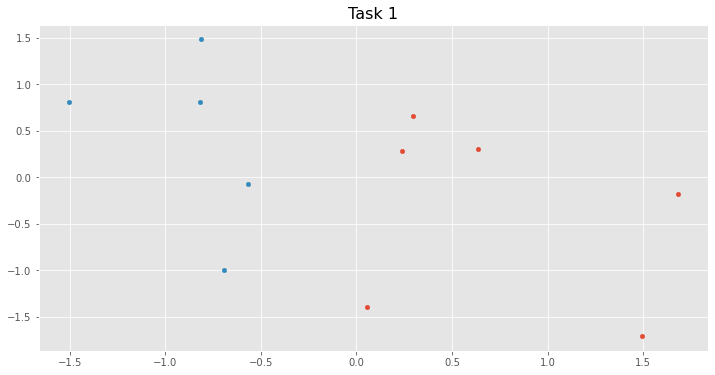

In [24]:
fig, ax = plt.subplots(figsize=(12,6))

for i, j in data1.groupby(2):
    plt.scatter(j[0], j[1], s=20)
    
ax.set_title('Task 1', fontsize=16)   
plt.show()

Для задачи 1 необходимо выбирать линейное ядро

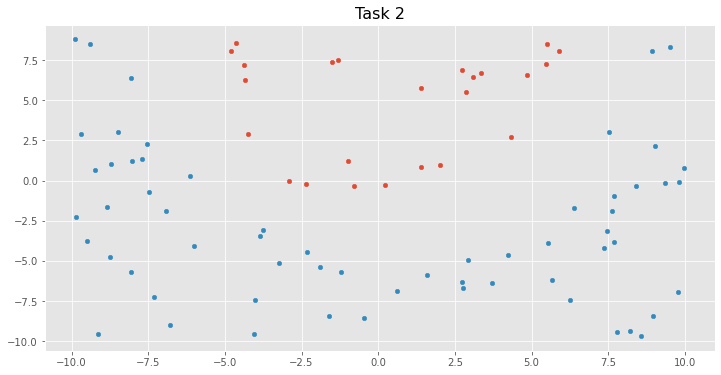

In [25]:
fig, ax = plt.subplots(figsize=(12,6))

for i, j in data2.groupby(2):
    plt.scatter(j[0], j[1], s=20)
    
ax.set_title('Task 2', fontsize=16)   
plt.show()    

Для задачи 2 можно выбрать полиномиальное ядро степени 2 или большей.

**Задание 2.** Обучите SVM из sklearn (`sklearn.svm.SVC`) с выбранными функциями ядра. Какие объекты оказались опорными? (методы `support_` и `support_vectors_` после применения метода `fit`)

In [27]:
from sklearn.svm import SVC

In [51]:
X = data1.iloc[:,:2]
Y = data1.iloc[:, 2]

In [52]:
clf = SVC(C=1, kernel='linear')
clf.fit(X, Y)

SVC(C=1, kernel='linear')

In [53]:
clf.support_

array([0, 1, 6, 2, 4, 5], dtype=int32)

In [54]:
clf.support_vectors_

array([[ 0.05783333, -1.39809578],
       [ 0.23638569,  0.28348681],
       [ 0.29379903,  0.66023859],
       [-0.81939127,  0.80969886],
       [-0.56784047, -0.07100018],
       [-0.69441368, -0.99227863]])

**Задание 3.** Отобразите на графике полученную разделяющую гиперплоскость (методы `coef_` и `intercept_` после применения `fit`).

In [58]:
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)

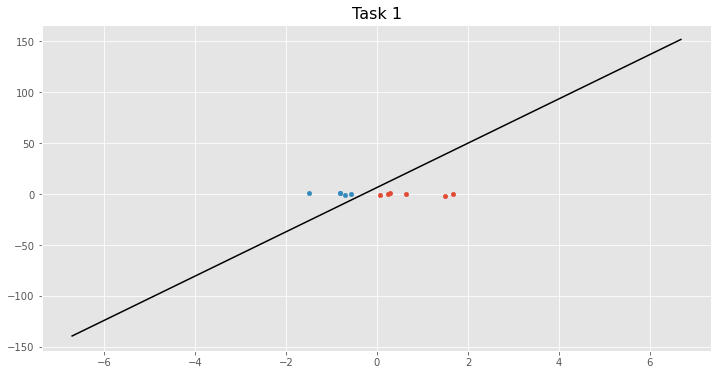

In [70]:
fig, ax = plt.subplots(figsize=(12,6))

plot_hyperplane(clf, min(min(X[0]), min(X[1])), max(max(X[0]), max(X[1])), 'black', 'Hyperline')
for i, j in data1.groupby(2):
    plt.scatter(j[0], j[1], s=20)
    
ax.set_title('Task 1', fontsize=16)   
plt.show()


**Задание 4.** В задаче `task2` проведите сравнение на графике различных функций ядра. (`kernel`: 'linear', 'poly', 'rbf', 'sigmoid', для полиномиального ядра 'poly' рассмотрите различные степени полинома `degree`).

In [71]:
X = data2.iloc[:,:2]
Y = data2.iloc[:, 2]

In [72]:
clf = SVC(C=1, kernel='poly', degree=2)
clf.fit(X, Y)

SVC(C=1, degree=2, kernel='poly')

In [73]:
clf.support_

array([ 2,  9, 12, 18, 20, 25, 28, 33, 36, 39, 47, 48, 50, 51, 54, 63, 64,
       68, 69, 72, 74, 75, 76, 82,  3,  4,  6,  8, 13, 16, 19, 21, 22, 23,
       24, 26, 29, 32, 38, 40, 43, 45, 46, 56, 58, 61, 62, 70, 78],
      dtype=int32)

In [75]:
clf.support_vectors_;

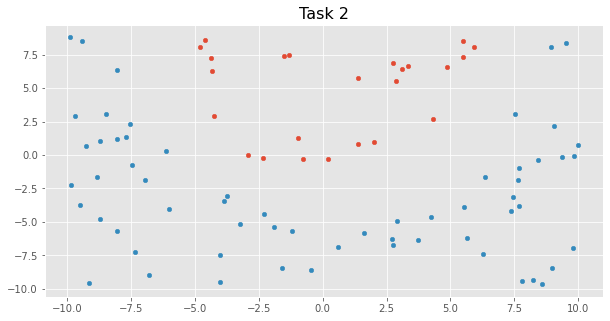

In [81]:
fig, ax = plt.subplots(figsize=(10,5))

for i, j in data2.groupby(2):
    plt.scatter(j[0], j[1], s=20)
    
    
    
ax.set_title('Task 2', fontsize=16)   
plt.show()  

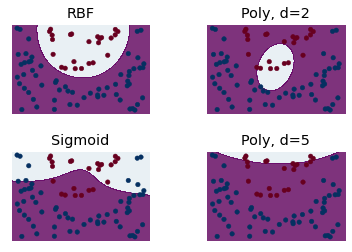

In [137]:
rbf_svm = SVC(C=1, kernel='rbf').fit(X, Y)
poly_svm = SVC(C=1, kernel='poly', degree=2).fit(X, Y)
sig_svm = SVC(C=1, kernel='sigmoid').fit(X, Y)
poly_svm2 = SVC(C=1, kernel='poly', degree=5).fit(X, Y)

# create a mesh to plot in
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# title for the plots
titles = [
          'RBF',
          'Poly, d=2',
          'Sigmoid',
            'Poly, d=5']


for i, clf in enumerate((rbf_svm, poly_svm, sig_svm, poly_svm2)):
    
    plt.subplot(2, 2, i + 1)
    
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='BuPu', alpha=0.8)

    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap='RdBu', s=20)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

**Задание 5.** Решите методов опорных векторов задачу `multiclass_classification` и отобразите результат на графике.

In [122]:
data3 = pd.read_csv('multiclass_classification.csv')

In [130]:
X1 = data3.iloc[:,:2]
Y1 = data3.iloc[:, 2]

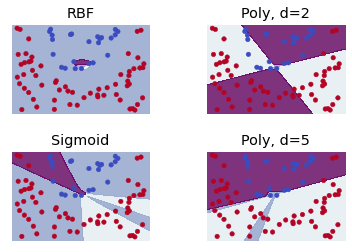

In [141]:
rbf_svm = SVC(C=1, kernel='rbf').fit(X1, Y1)
poly_svm = SVC(C=1, kernel='poly', degree=2).fit(X1, Y1)
sig_svm = SVC(C=1, kernel='sigmoid').fit(X1, Y1)
poly_svm2 = SVC(C=1, kernel='poly', degree=5).fit(X1, Y1)

# create a mesh to plot in
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# title for the plots
titles = [
          'RBF',
          'Poly, d=2',
          'Sigmoid',
            'Poly, d=5']


for i, clf in enumerate((rbf_svm, poly_svm, sig_svm, poly_svm2)):
    
    plt.subplot(2, 2, i + 1)
    
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='BuPu', alpha=0.8)

    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap='coolwarm', s=20)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

## Решение задачи классификации текстов

Возьмем в качестве примера данные новостей `fetch_20newsgroups` из sklearn и рассмотрим категории "атеизм" и "космос".

In [142]:
from sklearn.datasets import fetch_20newsgroups

In [143]:
data = fetch_20newsgroups(subset='all', categories=['alt.atheism', 'sci.space'])

Массив с текстами будет находиться в поле `data.data`, номер класса &ndash; в поле `data.target`. В этой задаче для преобразования текстов будем использовать метод Tf-Idf.

**Задание 1.** Преобразуйте тексты с помощью `TfIdfVectorizer`.

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [145]:
count_vec = TfidfVectorizer(max_features=30000, sublinear_tf=True, 
                            strip_accents='unicode', analyzer='word', 
                            token_pattern=r'\w{1,}')

In [148]:
count_vec.fit_transform(data.data)

<1786x28419 sparse matrix of type '<class 'numpy.float64'>'
	with 313811 stored elements in Compressed Sparse Row format>

In [149]:
data.target

array([0, 0, 1, ..., 1, 1, 0])

Реализация SVM находится в классе `sklearn.svm.SVC`. Веса каждого признака у обученного классификатора хранятся в поле `coef_`.

**Задание 2.** С помощью функции `sklearn.model_selection.GridSearchCV` выберите лучший параметр `C` для SVM с линейным ядром (`kernel='linear'`) из множества $[10^{-5}, 10^{-4}, 10^{-3}, ... , 10^{3}, 10^{4}, 10^{5}]$. Кросс-валидацию выполняйте по 5 блокам с параметром `random_state=241` и
для `SVC`, и для `KFold`. Качество оценивайте с помощью метрики `accuracy`.

In [189]:
clfText = SVC()

In [190]:
from sklearn.model_selection import cross_validate, KFold, GridSearchCV

In [191]:
kfold = KFold(n_splits=5, random_state=241, shuffle=True)

In [192]:
parameters = {'kernel':['linear'], 'C':[10**(-5), 10**(-4), 10**(-3), 10**(-2), 1/10, 1, 100, 1000, 10000, 100000]}

gs = GridSearchCV(clfText, parameters, cv=kfold, scoring='accuracy')

In [193]:
gs.fit(count_vec.fit_transform(data.data), data.target);

In [194]:
gs.best_params_

{'C': 1, 'kernel': 'linear'}

**Задание 3.** Обучите SVM на всей выборке с лучшим параметром `C`. Найдите 10 слов с наибольшим по модулю весом.

In [196]:
clfText = SVC(C=1, kernel='linear')
clfText.fit(count_vec.fit_transform(data.data), data.target)

SVC(C=1, kernel='linear')

In [242]:
ind = np.argsort(abs(clfText.coef_.toarray()))[:,-10:]
ind[0]

array([18183, 21886,  5789, 17826, 22966,  5100,  5105, 21879, 12889,
       24049])

In [244]:
np.array(count_vec.get_feature_names())[ind[0]]

array(['nasa', 'religious', 'bible', 'moon', 'sci', 'atheism', 'atheists',
       'religion', 'god', 'space'], dtype='<U80')